<a href="https://colab.research.google.com/github/martabarbosa1/Dashboard-Dojo/blob/main/Forecast/M_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
### Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import plotly.express as px

# from statsmodels.tsa.arima.model import ARIMA

In [23]:
### Load the Datasets
#originalyy downloaded from https://www.kaggle.com/datasets/sherrytp/airline-delay-analy
df2016 = pd.read_csv('https://raw.githubusercontent.com/Frans-Grau/Datasets/main/P5%20-%20Datasets/df2016.csv')
df2017 = pd.read_csv('https://raw.githubusercontent.com/Frans-Grau/Datasets/main/P5%20-%20Datasets/df2017.csv')
df2018 = pd.read_csv('https://raw.githubusercontent.com/Frans-Grau/Datasets/main/P5%20-%20Datasets/df2018.csv')

### Quick preprocessing
df_all = pd.concat([df2016,df2017,df2018], ignore_index = True, axis = 0)
df_all.drop(['Unnamed: 0','CANCELLED','DIVERTED'], axis=1, inplace= True)
df_all.dropna(inplace=True)
df_all['FL_DATE'] = pd.to_datetime(df_all['FL_DATE'])
df_all['AIRLINE'] = df_all['OP_CARRIER'].apply(lambda x: 'Delta Airlines' if x == 'DL' else 'Southwest Airlines' if x=='WN' else 'American Airlines' if x=='AA'
else 'JetBlue Airways' if x=='B6' else 'SkyWest Airlines' if x=='OO' else 'Atlantic Southeast Airlines' if x == 'EV' else 'United Airlines' if x == 'UA'
else 'Pinnacle Airlines' if x == '9E' else 'Spirit Airlines' if x== 'NK' else 'Alaska Airlines' if x == 'AS' else 'Virgin America' if x == 'VX' else 'Frontier' if x =='F9'
else 'Republic Airlines' if x == 'YX'else 'Hawaiian Airlines' if x == 'HA' else 'Envoy Air' if x == 'MQ' else 'Air Shuttle' if x == 'YV' else 'Allegiant Air' if x=='G4'
else 'Comair')
df_all.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,AIR_TIME,DISTANCE,AIRLINE
0,2016-01-01,DL,ATL,GRR,2125,2130.0,5.0,2321,2319.0,92.0,640.0,Delta Airlines
1,2016-01-01,DL,LAX,ATL,2255,2256.0,1.0,600,547.0,207.0,1947.0,Delta Airlines
2,2016-01-01,DL,ATL,BNA,1233,1356.0,83.0,1239,1402.0,38.0,214.0,Delta Airlines
3,2016-01-01,DL,ATL,JAX,945,946.0,1.0,1050,1053.0,45.0,270.0,Delta Airlines
4,2016-01-01,DL,ATL,OKC,2110,2107.0,-3.0,2236,2224.0,116.0,761.0,Delta Airlines


In [24]:
!pip install pmdarima
from pmdarima.arima import auto_arima
# auto_arima(np.random.randint(1,40, 21))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


ImportError: ignored

##2.1) Seasonal analysis

In [ ]:
#create the time series df with mean and std
df_delay= df_all.groupby('FL_DATE')['DEP_DELAY'].mean().reset_index()
df_delay = df_delay.sort_values('FL_DATE').set_index('FL_DATE')
df_delay_std = df_all.groupby('FL_DATE')['DEP_DELAY'].std().reset_index()
df_delay_std = df_delay_std.sort_values('FL_DATE').set_index('FL_DATE')

In [ ]:
#mean and standard deviation for LAX
df_delay_LAX = df_all[df_all['ORIGIN'] == 'LAX'].groupby('FL_DATE')['DEP_DELAY'].aggregate(['mean', 'std'])
df_delay_LAX 

,mean,std
FL_DATE,,
2016-01-01,9.163462,30.490945
2016-01-02,12.969751,60.453345
2016-01-03,23.267007,48.978963
2016-01-04,17.030252,37.965061
2016-01-05,27.391473,43.413588
...,...,...
2018-12-27,20.946154,59.916803
2018-12-28,15.190549,38.073075
2018-12-29,10.086885,27.368626


In [ ]:
#mean and standard deviation for JFK
df_delay_JFK = df_all[df_all['ORIGIN'] == 'JFK'].groupby('FL_DATE')['DEP_DELAY'].aggregate(['mean', 'std'])
df_delay_JFK 

,mean,std
FL_DATE,,
2016-01-01,6.403101,24.675487
2016-01-02,13.951852,34.310109
2016-01-03,18.619377,37.948436
2016-01-04,19.349823,49.865008
2016-01-05,13.684426,29.677464
...,...,...
2018-12-27,4.509434,23.193354
2018-12-28,29.485175,48.756113
2018-12-29,13.398281,34.331114


In [ ]:
#mean and standard deviation for ATL
df_delay_ATL = df_all[df_all['ORIGIN'] == 'ATL'].groupby('FL_DATE')['DEP_DELAY'].aggregate(['mean', 'std'])
df_delay_ATL

,mean,std
FL_DATE,,
2016-01-01,4.031133,16.607476
2016-01-02,6.690256,24.217369
2016-01-03,9.490347,34.309488
2016-01-04,4.346154,14.597309
2016-01-05,3.929012,23.374621
...,...,...
2018-12-27,24.792435,53.482786
2018-12-28,43.431099,79.246059
2018-12-29,19.451737,43.109058


In [ ]:
#create a df with both the total as well as every airport mean and std
df_new = df_all.groupby('FL_DATE')['DEP_DELAY'].aggregate(['mean', 'std'])
df_new = df_new.reset_index().reset_index()
df_new = df_new.sort_values(by = 'FL_DATE')
df_merge = df_new.merge(df_delay_LAX , left_on='FL_DATE', right_on='FL_DATE')
df_merge1 = df_merge.merge(df_delay_JFK , left_on='FL_DATE', right_on='FL_DATE')
df_merge1.rename(columns={'mean_x': 'mean_total',
                   'std_x': 'std_total', 'mean_y': 'mean_LAX', 'std_y': 'std_LAX', 'mean': 'mean_JFK', 'std' : 'std_JFK'},
          inplace=True, errors='raise')
df_merge2 = df_merge1.merge(df_delay_ATL , left_on='FL_DATE', right_on='FL_DATE')
df_merge2.rename(columns = {'mean' : 'mean_ATL', 'std' : 'std_ATL'}, inplace=True, errors='raise')
df_merge2

,index,FL_DATE,mean_total,std_total,mean_LAX,std_LAX,mean_JFK,std_JFK,mean_ATL,std_ATL
0,0,2016-01-01,6.106262,23.445792,9.163462,30.490945,6.403101,24.675487,4.031133,16.607476
1,1,2016-01-02,9.728279,40.469624,12.969751,60.453345,13.951852,34.310109,6.690256,24.217369
2,2,2016-01-03,15.104025,40.373921,23.267007,48.978963,18.619377,37.948436,9.490347,34.309488
3,3,2016-01-04,10.579281,31.355210,17.030252,37.965061,19.349823,49.865008,4.346154,14.597309
4,4,2016-01-05,12.293303,33.141775,27.391473,43.413588,13.684426,29.677464,3.929012,23.374621
...,...,...,...,...,...,...,...,...,...,...
1090,1091,2018-12-27,20.029929,52.237407,20.946154,59.916803,4.509434,23.193354,24.792435,53.482786
1091,1092,2018-12-28,32.150881,65.083753,15.190549,38.073075,29.485175,48.756113,43.431099,79.246059
1092,1093,2018-12-29,15.529323,37.642108,10.086885,27.368626,13.398281,34.331114,19.451737,43.109058
1093,1094,2018-12-30,12.451690,53.964928,8.209231,40.538888,8.093834,33.682807,16.517625,65.285824


In [ ]:
#another way to confirm the std

df_merge2['FL_DATE']

0      2016-01-01
1      2016-01-02
2      2016-01-03
3      2016-01-04
4      2016-01-05
          ...    
1090   2018-12-27
1091   2018-12-28
1092   2018-12-29
1093   2018-12-30
1094   2018-12-31
Name: FL_DATE, Length: 1095, dtype: datetime64[ns]

In [ ]:
#now melt the dataframe in order to create an animation in plotly
df_melt = pd.melt(df_merge2, id_vars=['FL_DATE'], value_vars=['mean_total', 'mean_LAX', 'mean_JFK', 'mean_ATL'])
df_melt.sort_values(by = ['FL_DATE'], inplace = True)
df_melt

,FL_DATE,variable,value
0,2016-01-01,mean_total,6.106262
2190,2016-01-01,mean_JFK,6.403101
1095,2016-01-01,mean_LAX,9.163462
3285,2016-01-01,mean_ATL,4.031133
2191,2016-01-02,mean_JFK,13.951852
...,...,...,...
1093,2018-12-30,mean_total,12.451690
2189,2018-12-31,mean_LAX,7.120287
1094,2018-12-31,mean_total,5.890700
3284,2018-12-31,mean_JFK,1.964516


In [ ]:
#create plotly with animation
fig = px.line(df_melt, x = df_melt['FL_DATE'], y = df_melt['value'], animation_frame = 'variable', color = 'variable', title = 'Time series_delays')
fig.update_layout(showlegend=True)
fig.update_yaxes(range=[-10, 200])
fig.show()

In [ ]:
#now melt the dataframe in order to create an animation in plotly with std
df_melt_std = pd.melt(df_merge2, id_vars=['FL_DATE'], value_vars=['std_total', 'std_LAX', 'std_JFK', 'std_ATL'])
df_melt_std.sort_values(by = ['FL_DATE'], inplace = True)
df_melt_std.rename(columns = {'value' : 'std', 'FL_DATE' : 'date'}, inplace = True)

In [ ]:
df3 = pd.concat([df_melt, df_melt_std],axis=1)
        #  .sort_index(level=2)
        #  .reset_index(level=2, drop=True)
        #  .reset_index())
df3

,FL_DATE,variable,value,date,variable,std
0,2016-01-01,mean_total,6.106262,2016-01-01,std_total,23.445792
2190,2016-01-01,mean_JFK,6.403101,2016-01-01,std_JFK,24.675487
1095,2016-01-01,mean_LAX,9.163462,2016-01-01,std_LAX,30.490945
3285,2016-01-01,mean_ATL,4.031133,2016-01-01,std_ATL,16.607476
2191,2016-01-02,mean_JFK,13.951852,2016-01-02,std_JFK,34.310109
...,...,...,...,...,...,...
1093,2018-12-30,mean_total,12.451690,2018-12-30,std_total,53.964928
2189,2018-12-31,mean_LAX,7.120287,2018-12-31,std_LAX,32.343840
1094,2018-12-31,mean_total,5.890700,2018-12-31,std_total,25.753552
3284,2018-12-31,mean_JFK,1.964516,2018-12-31,std_JFK,17.176846


In [ ]:
#Total : graphic with mean and std
fig = px.line(x = df_merge2['FL_DATE'], y = df_merge2['mean_total']) #, error_y = df_merge2['std_total'])#, animation_frame =  df_new['std_total'])#, error_y = df_new['std'])#, title = 'Time series_delays')
fig.update_yaxes(range=[-300, 300])
fig.show()
#this is not ok

In [ ]:
import plotly.graph_objs as go

fig = go.Figure([
    go.Scatter(
        x=df_merge2['FL_DATE'],
        y=df_merge2['mean_total'],
        line=dict(color='rgb(0,100,80)'),
        mode='lines'
    ),
    go.Scatter(
        # x=x+x[::-1], # x, then x reversed
        y=df_merge2['std_total']+df_merge2['std_total'],#[::-1], # upper, then lower reversed
        fill='toself',
        fillcolor='rgba(0,100,80,0.2)',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo="skip",
        showlegend=False
    )
])
fig.update_xaxes(range=[01-01-2016, 31-12-2018])
fig.show()

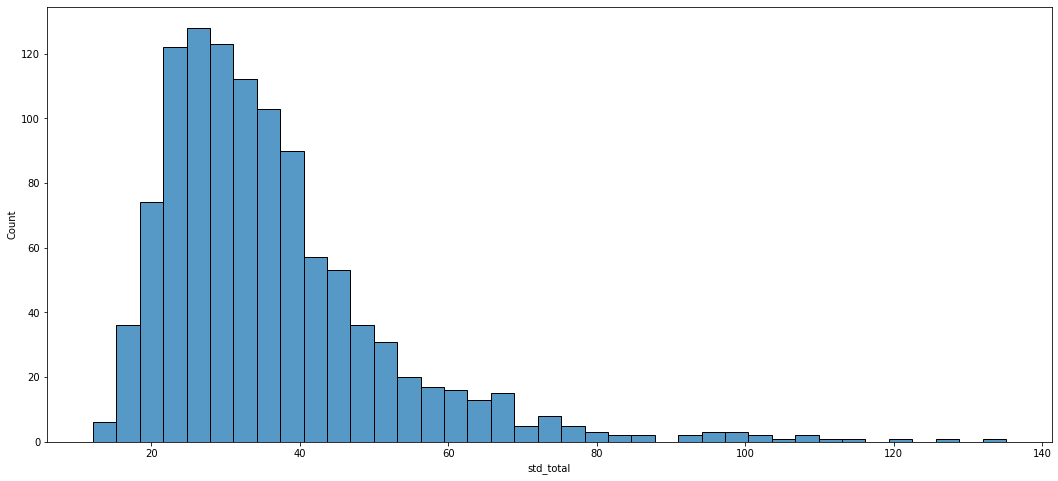

In [ ]:
#distribution of std
sns.histplot(data = df_merge2['std_total'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



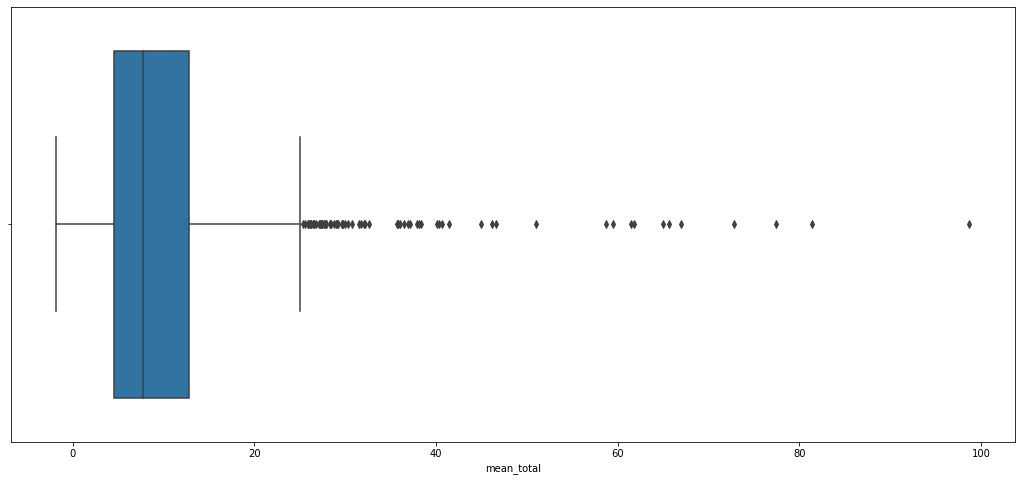

In [ ]:
sns.boxplot(df_merge2['mean_total'])

In [ ]:
#Ex remove outliers

Q1 = df_merge2['mean_total'].quantile([0.25])
Q3 = df_merge2['mean_total'].quantile([0.75])
Q3
# IQR = Q3 - Q1
# maximum = Q3 + 1.5*IQR
# maximum

KeyError: ignored

In [ ]:
#JFK : graphic with mean and std
fig = px.scatter(x = df_merge2['FL_DATE'], y = df_merge2['mean_JFK'], error_y = df_merge2['std_JFK'])#, animation_frame =  df_new['std_total'])#, error_y = df_new['std'])#, title = 'Time series_delays')
fig.update_yaxes(range=[-10, 100])
fig.show()

In [ ]:
#LAX : graphic with mean and std
fig = px.scatter(x = df_merge2['FL_DATE'], y = df_merge2['mean_LAX'], error_y = df_merge2['std_LAX'])#, animation_frame =  df_new['std_total'])#, error_y = df_new['std'])#, title = 'Time series_delays')
fig.update_yaxes(range=[-10, 100])
fig.show()

In [ ]:
#ATL : graphic with mean and std
fig = px.scatter(x = df_merge2['FL_DATE'], y = df_merge2['mean_ATL'], error_y = df_merge2['std_ATL'])#, animation_frame =  df_new['std_total'])#, error_y = df_new['std'])#, title = 'Time series_delays')
fig.update_yaxes(range=[-10, 100])
fig.show()

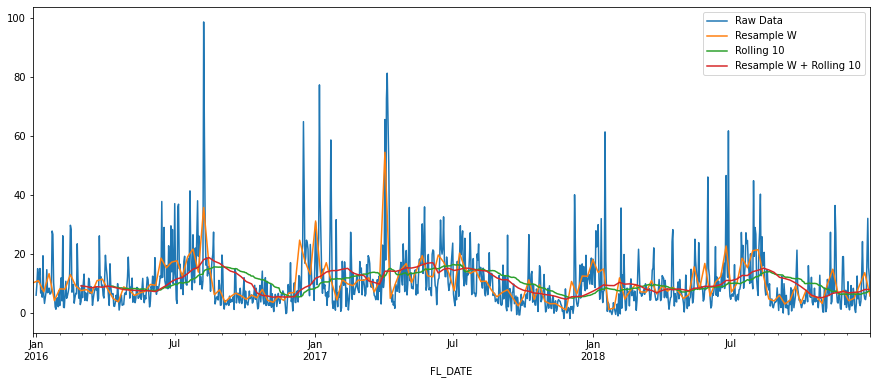

In [ ]:
#plot of the time series
df_delay['DEP_DELAY'].plot(figsize=(15, 6), label='Raw Data')
df_delay['DEP_DELAY'].resample('W').mean().plot(figsize=(15, 6), label='Resample W')
df_delay['DEP_DELAY'].rolling(100).mean().plot(figsize=(15, 6), label='Rolling 10')
df_delay['DEP_DELAY'].resample('W').mean().rolling(10).mean().plot(figsize=(15, 6), label='Resample W + Rolling 10')
plt.legend()

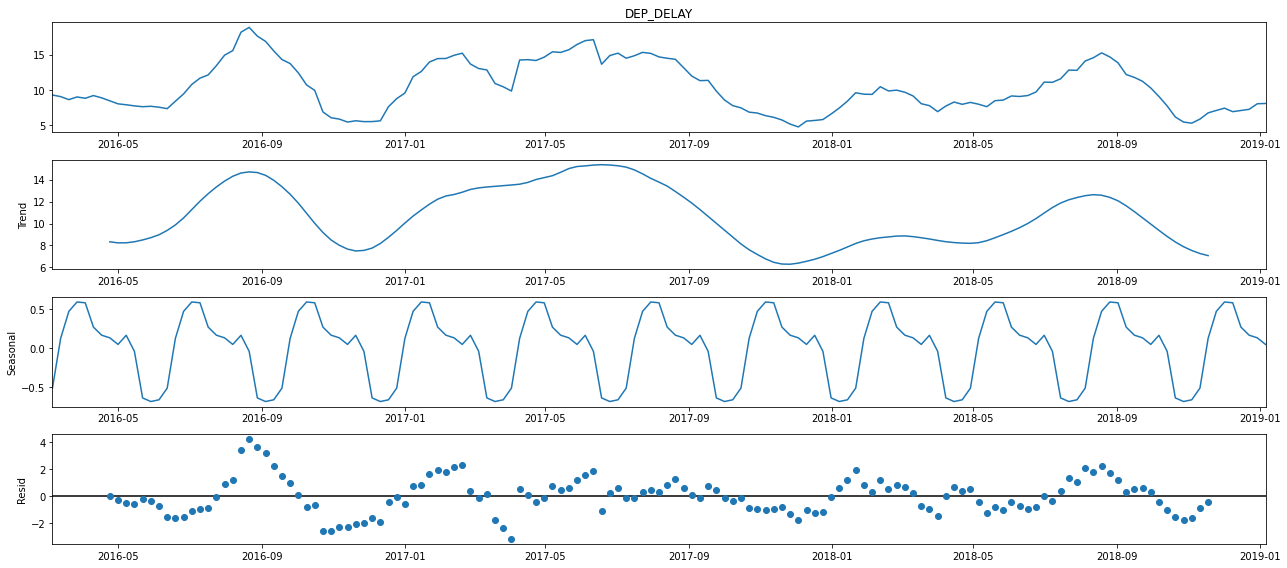

In [ ]:
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 18, 8
sig = df_delay['DEP_DELAY'].resample('W').mean()
decomposition = sm.tsa.seasonal_decompose(x = sig.rolling(10).mean().dropna(), period=14, model='additive')
fig = decomposition.plot()
plt.show()

#there is no seasonality because the residuals range is bigger than the seasonality range
#there is no trend 

##2.2) Autocorrelation

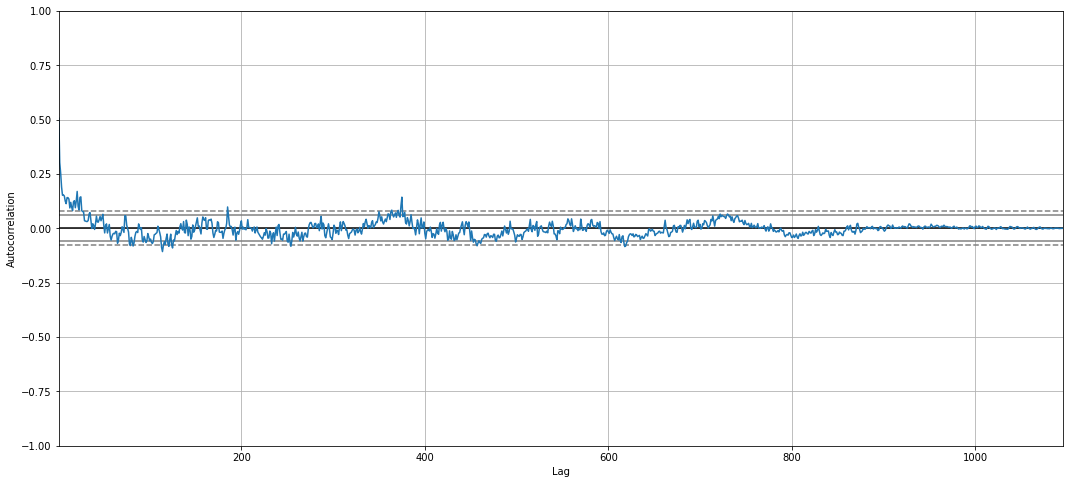

In [ ]:
from pandas.plotting import autocorrelation_plot
 
autocorrelation_plot(df_delay[:100000]) #this plot is plotting the correlations values by lag
plt.show()

##2.3) Stationary test

In [ ]:
from statsmodels.tsa.stattools import kpss

kpss(df_delay, regression='c', nlags = 'auto')
#We reject the null hypothesis (P=0.1 < alpha=0.05), so it's stationary with 95% confidence

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.28374007132757506,
 0.1,
 15,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [ ]:
kpss(df_delay, regression='ct', nlags = 'auto')

#We reject the null hypothesis (P=0.06 < alpha=0.05), so it's stationary with 95% confidence

(0.14074002491913623,
 0.05974069459419215,
 15,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

##2.4) ARIMA Model

In [26]:
print(df_delay.shape) #25% of 1096 is 274
print(df_delay.tail(274).shape)

(1096, 1)
(274, 1)


In [27]:
### ARIMA 
# Create the train set
train_set = df_delay.head(int(df_delay.shape[0]-273))
print(train_set.shape)
print('The minimum date we have is', train_set.index.min(), 'and the maximum date is ',  train_set.index.max())

# Create the test set
test_set = df_delay.tail(273)
print(test_set.shape)
print('The minimum date we have is', test_set.index.min(), 'and the maximum date is ',  test_set.index.max())

(823, 1)
The minimum date we have is 2016-01-01 00:00:00 and the maximum date is  2018-04-02 00:00:00
(273, 1)
The minimum date we have is 2018-04-03 00:00:00 and the maximum date is  2018-12-31 00:00:00


In [ ]:
#tune the parameters p, d, q using auto_arima
auto_arima(df_delay)
#best tuning with: p = 2, d = 0, q = 1

NameError: ignored

In [28]:
#fit model to the optimized parameters
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(train_set.values, order=(2,0,1))
arima_model_fit = arima_model.fit()
print(arima_model_fit.summary())

#forecast
arima_model_fit.forecast()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  823
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -2937.428
Date:                Mon, 16 Jan 2023   AIC                           5884.856
Time:                        14:25:07   BIC                           5908.421
Sample:                             0   HQIC                          5893.897
                                - 823                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5481      1.858      5.678      0.000       6.907      14.189
ar.L1          1.3860      0.049     28.310      0.000       1.290       1.482
ar.L2         -0.4064      0.038    -10.599      0.0

array([10.78464111])

In [29]:
#check if it makes sense, the value makes sense with the whole dataframe and is actually close to the mean
df_delay.mean()

DEP_DELAY    10.339835
dtype: float64

In [ ]:
#create a plot with the prediction vs real values
#create a column with the prediction


In [ ]:
#lineplot the residuals

# # line plot of residuals
# residuals = DataFrame(model_fit.resid)
# residuals.plot()
# pyplot.show()
# # density plot of residuals
# residuals.plot(kind='kde')
# pyplot.show()
# # summary stats of residuals
# print(residuals.describe())

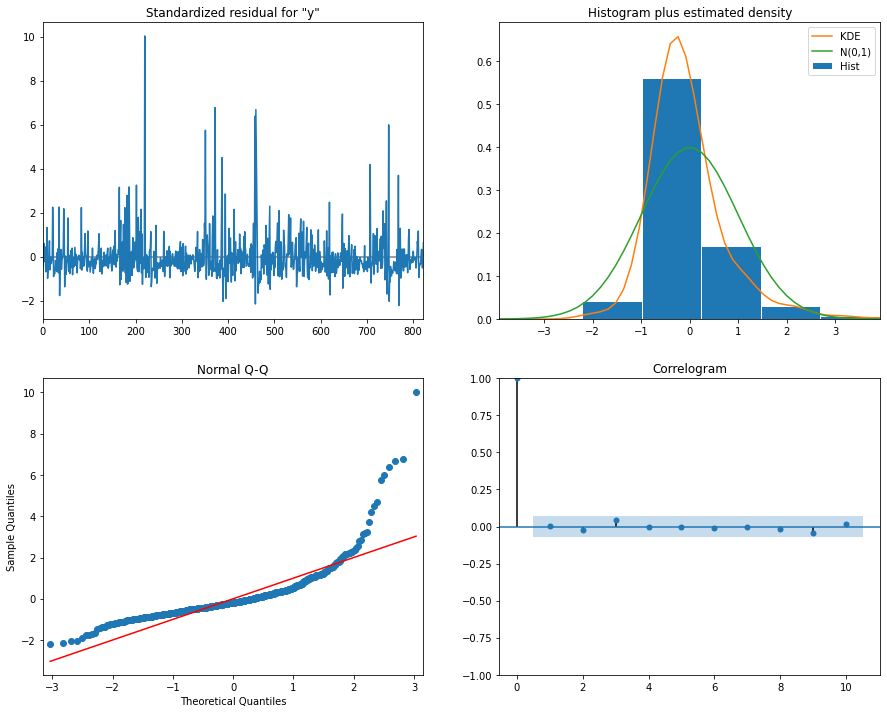

In [30]:
arima_model_fit.plot_diagnostics(figsize=(15,12))
plt.show()

In [31]:
allx = list(range(1, 274))
allx.reverse()

def forecastx(x):
    test_set = df_delay.tail(x)
    train_set = df_delay.head(int(df_delay.shape[0]-test_set.shape[0]))
    arima_model = ARIMA(train_set['DEP_DELAY'], order=(2,0,1), freq = 'D')
    arima_model_fit = arima_model.fit()
    arima_model_fit.forecast()
    forecast =  arima_model_fit.forecast()
    return forecast

dep_delay_forecast = list(map(forecastx, allx))
dep_delay_forecast

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information w

[2018-04-03    10.784641
 Freq: D, dtype: float64, 2018-04-04    10.706062
 Freq: D, dtype: float64, 2018-04-05    10.540641
 Freq: D, dtype: float64, 2018-04-06    7.554097
 Freq: D, dtype: float64, 2018-04-07    10.242052
 Freq: D, dtype: float64, 2018-04-08    7.91849
 Freq: D, dtype: float64, 2018-04-09    7.452532
 Freq: D, dtype: float64, 2018-04-10    8.686263
 Freq: D, dtype: float64, 2018-04-11    6.842376
 Freq: D, dtype: float64, 2018-04-12    5.41741
 Freq: D, dtype: float64, 2018-04-13    6.317359
 Freq: D, dtype: float64, 2018-04-14    6.989865
 Freq: D, dtype: float64, 2018-04-15    7.098586
 Freq: D, dtype: float64, 2018-04-16    15.902651
 Freq: D, dtype: float64, 2018-04-17    18.338265
 Freq: D, dtype: float64, 2018-04-18    9.015274
 Freq: D, dtype: float64, 2018-04-19    6.467661
 Freq: D, dtype: float64, 2018-04-20    8.291106
 Freq: D, dtype: float64, 2018-04-21    7.044503
 Freq: D, dtype: float64, 2018-04-22    6.753228
 Freq: D, dtype: float64, 2018-04-23    8

In [32]:
#testing to create a series, each value is a list
forecast = pd.Series(dep_delay_forecast)
type(forecast[1]) # it's a series

pandas.core.series.Series

In [33]:
#so, if we pd.concat, we get a series with each value as a value
forecast = pd.concat(dep_delay_forecast)
type(forecast)

pandas.core.series.Series

In [66]:
#now, we can create a dataframe and compare the test_set and the forescasted values
test_forecast = pd.concat([test_set, forecast], axis = 1)
test_forecast = test_forecast.rename(columns={'DEP_DELAY' : 'Test_set', 0: 'Forecast_ARIMA'})
test_forecast

,Test_set,Forecast_ARIMA
2018-04-03,12.306523,10.784641
2018-04-04,11.730656,10.706062
2018-04-05,5.262163,10.540641
2018-04-06,11.131015,7.554097
2018-04-07,6.083773,10.242052
...,...,...
2018-12-27,20.029929,7.669784
2018-12-28,32.150881,13.731376
2018-12-29,15.529323,19.611367
2018-12-30,12.451690,12.778915


In [67]:
#we can plot it
fig = px.line(test_forecast, x = test_forecast.index, y = ['Test_set', 'Forecast_ARIMA']) #, color_discrete_sequence=["#ff97ff"])
fig.show()

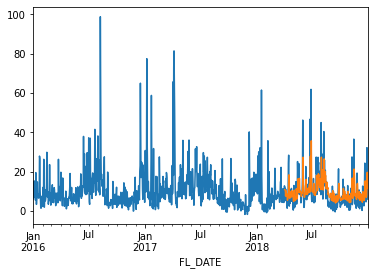

In [68]:
#plot the whole dataset
df_delay['DEP_DELAY'].plot()
test_forecast['Forecast_ARIMA'].plot()

In [69]:
# To evaluate the forecast we use the mean squared error
from sklearn.metrics import mean_squared_error

mean_squared_error(test_forecast['Test_set'], test_forecast['Forecast_ARIMA']) #59.93

#https://www.bmc.com/blogs/mean-squared-error-r2-and-variance-in-regression-analysis/
#There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect. 
#Since there is no correct answer, the MSE’s basic value is in selecting one prediction model over another.

59.93489540256182

In [ ]:
#try the exponential smoothing forecast

from statsmodels.tsa.holtwinters import ExponentialSmoothing

allx = list(range(1, 274))
allx.reverse()

def expsm_forecastx(x):
    test_set = df_delay.tail(x)
    train_set = df_delay.head(int(df_delay.shape[0]-test_set.shape[0]))
    exp_smoothing = ExponentialSmoothing(train_set['DEP_DELAY'])
    exp_smoothing_fit = exp_smoothing.fit(optimized = True)
    exp_smoothing_fit.forecast()
    forecast =  exp_smoothing_fit.forecast()
    return forecast.iloc[0]

dep_delay_forecast_expsm = list(map(expsm_forecastx, allx))


In [71]:
dep_delay_forecast_expsm = pd.Series(dep_delay_forecast_expsm, name = 'Forecast_Expsm')
dep_delay_forecast_expsm

0       8.699577
1      10.117782
2      10.752963
3       8.596328
4       9.590360
         ...    
268     6.963468
269    11.489163
270    18.758946
271    17.599416
272    15.798170
Name: Forecast_Expsm, Length: 273, dtype: float64

In [72]:
#now, we can create a dataframe and compare the test_set and the forescasted_expsm values
test_forecast_new = pd.concat([test_forecast, dep_delay_forecast_expsm], axis = 1)
# test_forecast_new = test_forecast_new.rename(columns={'DEP_DELAY' : 'Test_set', 0: 'Forecast_Expsm'})
test_forecast_new


test_forecast['Forecast_Expsm'] = list(dep_delay_forecast_expsm)
test_forecast

,Test_set,Forecast_ARIMA,Forecast_Expsm
2018-04-03,12.306523,10.784641,8.699577
2018-04-04,11.730656,10.706062,10.117782
2018-04-05,5.262163,10.540641,10.752963
2018-04-06,11.131015,7.554097,8.596328
2018-04-07,6.083773,10.242052,9.590360
...,...,...,...
2018-12-27,20.029929,7.669784,6.963468
2018-12-28,32.150881,13.731376,11.489163
2018-12-29,15.529323,19.611367,18.758946
2018-12-30,12.451690,12.778915,17.599416


In [73]:
fig = px.line(test_forecast, x = test_forecast.index, y = ['Test_set', 'Forecast_ARIMA', 'Forecast_Expsm']) #, color_discrete_sequence=["#ff97ff"])
fig.show()

In [74]:
# To evaluate the forecast we use the mean squared error
from sklearn.metrics import mean_squared_error

mean_squared_error(test_forecast['Test_set'], test_forecast['Forecast_Expsm']) #65.56

#https://www.bmc.com/blogs/mean-squared-error-r2-and-variance-in-regression-analysis/
#There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect. 
#Since there is no correct answer, the MSE’s basic value is in selecting one prediction model over another.

65.55627783489449

In [ ]:
#try to optimize exponential smoothing

#select the model parameters to optimize
# trend_value = ['add', 'mul', 'additive', 'multiplicative', None]
trend_value = ['additive']
# frequency_value = ['B', 'D', 'W', 'M', 'A', 'Q'] #gives error

#select the fit method parameters to optimize
smoothing_level_value = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# optimized_value = [True, False] # will not be used beause gives the following error: unsupported operand type(s) for *: 'NoneType' and 'float' when using False
remove_bias_value = [True, False]
method_value = ['L-BFGS-B', 'TNC', 'SLSQP', 'Powell', 'trust-constr', 'basinhopping', 'least_squares']
use_brute_value = [True, False]

#import the product tool
from itertools import product

#create a list of parameters combinations
mix = list(product(trend_value, smoothing_level_value, remove_bias_value, method_value, use_brute_value))

#call the global variable allx
allx = list(range(1, 274))
allx.reverse()

#create a function to optimize the model
def optimization(x, m):
    #call the internal variable m which lists the parameters to consider
    a, b, c, d, e = m
    #call the model
    test_set = df_delay.tail(x)
    train_set = df_delay.head(int(df_delay.shape[0]-test_set.shape[0]))
    exp_smoothing = ExponentialSmoothing(train_set[train_set['DEP_DELAY'] > 0], trend = a)
    exp_smoothing_fit = exp_smoothing.fit(smoothing_level = b, remove_bias = c, method = d, use_brute = e)
    exp_smoothing_fit.forecast()
    forecast =  exp_smoothing_fit.forecast()
    return forecast.iloc[0], m

dep_delay_forecast_expsm_optm = list(map(optimization, allx, mix))

In [82]:
print(len(dep_delay_forecast_expsm_optm))
print(len(mix))

273
280


In [ ]:
dep_delay_forecast_expsm_optm

In [ ]:
##testing the product function in python

#initiate the parameters to combine
trend_value = ['add', 'mul', 'additive', 'multiplicative', None]
smoothing_level_value = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
remove_bias_value = [True, False]
method_value = ['L-BFGS-B', 'TNC', 'SLSQP', 'Powell', 'trust-constr', 'basinhopping', 'least_squares']
use_brute_value = [True, False]

In [ ]:
#import the tool 'product' (which returns a cartesian product of input iterables)
from itertools import product

#test the product function
a = list(product(trend_value, smoothing_level_value, remove_bias_value, method_value, use_brute_value))

a[0]
b, c, d, e, f = a[0]

print(d)

True


In [ ]:
#try to optimize exponential smoothing: trend = 'add'

#select the model parameters to optimize
# trend_value = ['add', 'mul', 'additive', 'multiplicative', None] #here trying to pass the product from itertools each time the trend
# frequency_value = ['B', 'D', 'W', 'M', 'A', 'Q'] #gives error

#select the fit method parameters to optimize
smoothing_level_value = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# optimized_value = [True, False] # will not be used beause gives the following error: unsupported operand type(s) for *: 'NoneType' and 'float' when using False
remove_bias_value = [True, False]
method_value = ['L-BFGS-B', 'TNC', 'SLSQP', 'Powell', 'trust-constr', 'basinhopping', 'least_squares']
use_brute_value = [True, False]

#import the product tool
from itertools import product

#create a list of parameters combinations
mix = list(product(smoothing_level_value, remove_bias_value, method_value, use_brute_value))

#call the global variable allx
allx = list(range(1, 274))
allx.reverse()

#create a function to optimize the model
def optimization(x, m):
    #call the internal variable m which lists the parameters to consider
    b, c, d, e = m
    #call the model
    test_set = df_delay.tail(x)
    train_set = df_delay.head(int(df_delay.shape[0]-test_set.shape[0]))

    exp_smoothing = ExponentialSmoothing(train_set[train_set['DEP_DELAY'] > 0], trend = 'add')
    
    exp_smoothing_fit = exp_smoothing.fit(smoothing_level = b, remove_bias = c, method = d, use_brute = e)
    exp_smoothing_fit.forecast()
    forecast =  exp_smoothing_fit.forecast()
    return forecast.iloc[0], m

dep_delay_forecast_expsm_optm_add = list(map(optimization, allx, mix))

In [ ]:
#try to optimize exponential smoothing: trend = 'mul'

#select the model parameters to optimize
# trend_value = ['add', 'mul', 'additive', 'multiplicative', None] #here trying to pass the product from itertools each time the trend
# frequency_value = ['B', 'D', 'W', 'M', 'A', 'Q'] #gives error

#select the fit method parameters to optimize
smoothing_level_value = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# optimized_value = [True, False] # will not be used beause gives the following error: unsupported operand type(s) for *: 'NoneType' and 'float' when using False
remove_bias_value = [True, False]
method_value = ['L-BFGS-B', 'TNC', 'SLSQP', 'Powell', 'trust-constr', 'basinhopping', 'least_squares']
use_brute_value = [True, False]

#import the product tool
from itertools import product

#create a list of parameters combinations
mix = list(product(smoothing_level_value, remove_bias_value, method_value, use_brute_value))

#call the global variable allx
allx = list(range(1, 274))
allx.reverse()

#create a function to optimize the model
def optimization(x, m):
    #call the internal variable m which lists the parameters to consider
    b, c, d, e = m
    #call the model
    test_set = df_delay.tail(x)
    train_set = df_delay.head(int(df_delay.shape[0]-test_set.shape[0]))

    exp_smoothing = ExponentialSmoothing(train_set[train_set['DEP_DELAY'] > 0], trend = 'add')
    
    exp_smoothing_fit = exp_smoothing.fit(smoothing_level = b, remove_bias = c, method = d, use_brute = e)
    exp_smoothing_fit.forecast()
    forecast =  exp_smoothing_fit.forecast()
    return forecast.iloc[0], m

dep_delay_forecast_expsm_optm_mul = list(map(optimization, allx, mix))

In [ ]:
#try to optimize exponential smoothing: trend = 'mul'

#select the model parameters to optimize
# trend_value = ['add', 'mul', 'additive', 'multiplicative', None] #here trying to pass the product from itertools each time the trend
# frequency_value = ['B', 'D', 'W', 'M', 'A', 'Q'] #gives error

#select the fit method parameters to optimize
smoothing_level_value = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# optimized_value = [True, False] # will not be used beause gives the following error: unsupported operand type(s) for *: 'NoneType' and 'float' when using False
remove_bias_value = [True, False]
method_value = ['L-BFGS-B', 'TNC', 'SLSQP', 'Powell', 'trust-constr', 'basinhopping', 'least_squares']
use_brute_value = [True, False]

#import the product tool
from itertools import product

#create a list of parameters combinations
mix = list(product(smoothing_level_value, remove_bias_value, method_value, use_brute_value))

#call the global variable allx
allx = list(range(1, 274))
allx.reverse()

#create a function to optimize the model
def optimization(x, m):
    #call the internal variable m which lists the parameters to consider
    b, c, d, e = m
    #call the model
    test_set = df_delay.tail(x)
    train_set = df_delay.head(int(df_delay.shape[0]-test_set.shape[0]))

    exp_smoothing = ExponentialSmoothing(train_set[train_set['DEP_DELAY'] > 0], trend = 'additive')
    
    exp_smoothing_fit = exp_smoothing.fit(smoothing_level = b, remove_bias = c, method = d, use_brute = e)
    exp_smoothing_fit.forecast()
    forecast =  exp_smoothing_fit.forecast()
    return forecast.iloc[0], m

dep_delay_forecast_expsm_optm_additive = list(map(optimization, allx, mix))

In [ ]:
#try to optimize exponential smoothing: trend = multiplicative

#select the model parameters to optimize
# trend_value = ['add', 'mul', 'additive', 'multiplicative', None] #here trying to pass the product from itertools each time the trend
# frequency_value = ['B', 'D', 'W', 'M', 'A', 'Q'] #gives error

#select the fit method parameters to optimize
smoothing_level_value = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# optimized_value = [True, False] # will not be used beause gives the following error: unsupported operand type(s) for *: 'NoneType' and 'float' when using False
remove_bias_value = [True, False]
method_value = ['L-BFGS-B', 'TNC', 'SLSQP', 'Powell', 'trust-constr', 'basinhopping', 'least_squares']
use_brute_value = [True, False]

#import the product tool
from itertools import product

#create a list of parameters combinations
mix = list(product(smoothing_level_value, remove_bias_value, method_value, use_brute_value))

#call the global variable allx
allx = list(range(1, 274))
allx.reverse()

#create a function to optimize the model
def optimization(x, m):
    #call the internal variable m which lists the parameters to consider
    b, c, d, e = m
    #call the model
    test_set = df_delay.tail(x)
    train_set = df_delay.head(int(df_delay.shape[0]-test_set.shape[0]))

    exp_smoothing = ExponentialSmoothing(train_set[train_set['DEP_DELAY'] > 0], trend = 'multiplicative')
    
    exp_smoothing_fit = exp_smoothing.fit(smoothing_level = b, remove_bias = c, method = d, use_brute = e)
    exp_smoothing_fit.forecast()
    forecast =  exp_smoothing_fit.forecast()
    return forecast.iloc[0], m

dep_delay_forecast_expsm_optm_multiplicative = list(map(optimization, allx, mix))

In [ ]:
#try to optimize exponential smoothing: trend = None

#select the model parameters to optimize
# trend_value = ['add', 'mul', 'additive', 'multiplicative', None] #here trying to pass the product from itertools each time the trend
# frequency_value = ['B', 'D', 'W', 'M', 'A', 'Q'] #gives error

#select the fit method parameters to optimize
smoothing_level_value = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# optimized_value = [True, False] # will not be used beause gives the following error: unsupported operand type(s) for *: 'NoneType' and 'float' when using False
remove_bias_value = [True, False]
method_value = ['L-BFGS-B', 'TNC', 'SLSQP', 'Powell', 'trust-constr', 'basinhopping', 'least_squares']
use_brute_value = [True, False]

#import the product tool
from itertools import product

#create a list of parameters combinations
mix = list(product(smoothing_level_value, remove_bias_value, method_value, use_brute_value))

#call the global variable allx
allx = list(range(1, 274))
allx.reverse()

#create a function to optimize the model
def optimization(x, m):
    #call the internal variable m which lists the parameters to consider
    b, c, d, e = m
    #call the model
    test_set = df_delay.tail(x)
    train_set = df_delay.head(int(df_delay.shape[0]-test_set.shape[0]))

    exp_smoothing = ExponentialSmoothing(train_set[train_set['DEP_DELAY'] > 0], trend = None)
    
    exp_smoothing_fit = exp_smoothing.fit(smoothing_level = b, remove_bias = c, method = d, use_brute = e)
    exp_smoothing_fit.forecast()
    forecast =  exp_smoothing_fit.forecast()
    return forecast.iloc[0], m

dep_delay_forecast_expsm_optm_none = list(map(optimization, allx, mix))

In [158]:
len(dep_delay_forecast_expsm_optm_none)

273

In [159]:
len(mix)

280

In [162]:
es_none_df = pd.DataFrame(dep_delay_forecast_expsm_optm_none).rename(columns = {0 : 'None_forecast', 1 : 'Parameters'})
es_none_df

,None_forecast,Parameters
0,8.188049,"(0.1, True, L-BFGS-B, True)"
1,8.603025,"(0.1, True, L-BFGS-B, False)"
2,8.918208,"(0.1, True, TNC, True)"
3,8.547167,"(0.1, True, TNC, False)"
4,8.807240,"(0.1, True, SLSQP, True)"
...,...,...
268,6.493599,"(1.0, False, TNC, True)"
269,20.029929,"(1.0, False, TNC, False)"
270,32.150881,"(1.0, False, SLSQP, True)"
271,15.529323,"(1.0, False, SLSQP, False)"


##Predict for future dates

1) Using the arima model

In [ ]:
#create a new X for future values
#2019-01-01 : 2019-03-01

In [ ]:
allx = list(range(1, 274))
allx.reverse()

def forecast_ahead(x):
    test_set = df_delay.tail(x)
    train_set = df_delay.head(int(df_delay.shape[0]-test_set.shape[0]))
    arima_model = ARIMA(train_set['DEP_DELAY'], order=(2,0,1), freq = 'D')
    arima_model_fit = arima_model.fit()
    arima_model_fit.forecast()
    get_forecast =  arima_model_fit.get_forecast(4)
    return arima_model_fit.get_forecast(4)

dep_delay_forecast_ahead = list(map(forecast_ahead, allx))
dep_delay_forecast_ahead

In [165]:
dep_delay_forecast_ahead

In [164]:
results_df=.summary_frame(alpha=0.05).apply(np.exp)[["mean","mean_ci_lower","mean_ci_upper"]]
results_df.round(1)

AttributeError: ignored